# Assessment 4 


# Importing HPC Files

Here we just import all of our data sets and we later combine them into one suitable data frame for our Neural Network and then perform some pre-processing of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)
import pickle
import matplotlib.pyplot as plt


df_1 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS1.zip",header=None)
df_2 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS2.zip",header=None)
df_3 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS3.zip",header=None)
df_4 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS4.zip",header=None)

/Users/lukehawley/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/lukehawley/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


At this point we saw that the header names are not exactly easy to read so we just slightly adjust them from the original headers.

In [2]:
colnames = (['source_ip', 'source_port', 'dest_ip', 'dest_port', 'proto', 'state', 'duration', 'source_bytes', 'dest_bytes', 'source_ttl',
             'dest_ttl', 'source_loss', 'dest_loss', 'service', 'source_load', 'dest_load', 'source_pkts', 'dest_pkts', 'source_TP_win', 'dest_TP_win', 
             'source_tcp_bn', 'dest_tcp_bn', 'source_mean_sz', 'dest_mean_sz', 'trans_depth', 'res_bdy_len', 'source_jitter', 'dest_jitter', 'start_time',
             'last_time', 'source_int_pk_time', 'dest_int_pk_time', 'tcp_rtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'count_state_ttl', 
             'count_flw_http_mthd', 'is_ftp_login', 'count_ftp_cmd', 'count_srv_source', 'count_srv_dest', 'count_dest_ltm',
             'count_source_ltm', 'count_source_destport_ltm', 'count_dest_sourceport_ltm', 'counts_dest_source_ltm', 'attack_cat', 'Label'])
df_1.columns = colnames
df_2.columns = colnames
df_3.columns = colnames
df_4.columns = colnames

In [3]:
data_frames = [df_1,df_2,df_3,df_4]
data = pd.concat(data_frames)

# EDA 

In this section, the aim is to get our data into a suitable format for running a neural network on it. This will involve checking for inf and NaN values, any missingnss in our data, scaling appropriately and ensuring our data is of the correct type to be classified, namely integer or float.

In [4]:
data.head()

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [5]:
#DataFrame with columns
columns = pd.DataFrame(list(data.columns.values[1:]))

#DataFrame with data types
data_types = pd.DataFrame(data.dtypes, columns=['Data Type'])

#DataFrame with unique values
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(data.columns.values):
    unique_value_counts.loc[v] = [data[v].nunique()]

missing_data_counts = pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])
data_quality_report = data_types.join(unique_value_counts).join(missing_data_counts)
print('Data Quality Report')
data_quality_report

Data Quality Report


,Data Type,Unique Values,Missing Values
source_ip,object,43,0
source_port,object,100341,0
dest_ip,object,47,0
dest_port,object,128297,0
proto,object,135,0
state,object,16,0
duration,float64,587303,0
source_bytes,int64,14155,0
dest_bytes,int64,19166,0
source_ttl,int64,13,0


From this we can see that there are a number of columns of the wrong data type and several with missing values. Attack_cat is expected to have NaN values as this was touched upon into the introduction for the data. From Alex's analysis we know that count_flw_http_mthd and is_ftp_login are missing values and have NaN values which we know how to fix. 

Let us first try and replace some missing values.

From the description for is_ftp_login we see that the values should only be 0 or 1 but we have 2 and 4 and we are not quite sure why but since its median is 0 we will jsut impute the data as 0. Similarily for Count_flw_http_mthd, its median is also 0 so we also impute missing values as 0.

In [6]:
data =data.fillna(0)

In [7]:
data.groupby('count_flw_http_mthd').size()

count_flw_http_mthd
0.0     2334936
1.0      188008
2.0         588
3.0         738
4.0        6564
5.0         430
6.0        7902
8.0          56
9.0         270
10.0         30
12.0        132
14.0        224
16.0         48
25.0         25
30.0         60
36.0         36
dtype: int64

In [8]:
data.groupby('is_ftp_login').size()

is_ftp_login
0.0    2496472
1.0      43389
2.0         30
4.0        156
dtype: int64

Lets see how count_ftp_cmd is made up.

In [9]:
data.groupby('count_ftp_cmd').size()


count_ftp_cmd
0    1056339
1      17087
2       1234
3        729
4        804
5        290
6        332
8         18
     1429879
0      10159
1      22990
2         30
4        156
dtype: int64

As there are just missing values we simply replace them with 0.

In [10]:
data['count_ftp_cmd'] = data['count_ftp_cmd'].replace(' ',0)
data.groupby('count_ftp_cmd').size()


count_ftp_cmd
0    2486218
1      17087
2       1234
3        729
4        804
5        290
6        332
8         18
0      10159
1      22990
2         30
4        156
dtype: int64

Now we must replace all the object data types to either float or integer types. I tried using to.numeric from pandas but due to the values we have, this proved more hassle than it was worth, especially given Matt has a tried and tested method which involes mapping the data to new columns and removing the old columns as follows.

In [11]:
data_source_ip = pd.DataFrame(data['source_ip'])
data_source_port = pd.DataFrame(data['source_port'])
data_dest_ip = pd.DataFrame(data['dest_ip'])
data_dest_port = pd.DataFrame(data['dest_port'])
data_proto = pd.DataFrame(data['proto'])
data_state = pd.DataFrame(data['state'])
data_service = pd.DataFrame(data['service'])
data_count_ftp_cmd = pd.DataFrame(data['count_ftp_cmd'])
data_attack_cat = pd.DataFrame(data['attack_cat'])

In [12]:
sips = data.source_ip.unique()
sip_dict = dict(zip(sips,range(len(sips))))

sp = data.source_port.unique()
sp_dict = dict(zip(sp,range(len(sp))))
               
dips = data.dest_ip.unique()
dip_dict = dict(zip(dips,range(len(dips))))

dp = data.dest_port.unique()
dp_dict = dict(zip(dp,range(len(dp))))

p = data.proto.unique()
p_dict = dict(zip(p,range(len(p))))

states = data.state.unique()
state_dict = dict(zip(states,range(len(states))))

services = data.service.unique()
service_dict = dict(zip(services,range(len(services))))

cfc = data.count_ftp_cmd.unique()
cfc_dict = dict(zip(cfc,range(len(cfc))))

ac = data.attack_cat.unique()
ac_dict = dict(zip(ac,range(len(ac))))

In [13]:
#Mapping the dictionaries to data frames 
data['source_ip_int'] = data['source_ip'].map(sip_dict)
data['source_port_int'] = data['source_port'].map(sp_dict)
data['dest_ip_int'] = data['dest_ip'].map(dip_dict)
data['dest_port_int'] = data['dest_port'].map(dp_dict)
data['proto_int'] = data['proto'].map(p_dict)
data['state_int'] = data['state'].map(state_dict)
data['service_int'] = data['service'].map(service_dict)
data['count_ftp_cmd_int'] = data['count_ftp_cmd'].map(cfc_dict)
data['attack_cat_int'] = data['attack_cat'].map(ac_dict)

In [14]:
#Reomving the old data frames
data = data.drop('source_ip',axis=1)
data = data.drop('source_port',axis=1)
data = data.drop('dest_ip',axis=1)
data = data.drop('dest_port',axis=1)
data = data.drop('proto',axis=1)
data = data.drop('state',axis=1)
data = data.drop('service',axis=1)
data = data.drop('count_ftp_cmd',axis=1)
data = data.drop('attack_cat',axis=1)

In [15]:
#DataFrame with columns
columns = pd.DataFrame(list(data.columns.values[1:]))

#DataFrame with data types
data_types = pd.DataFrame(data.dtypes, columns=['Data Type'])

#DataFrame with unique values
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(data.columns.values):
    unique_value_counts.loc[v] = [data[v].nunique()]

missing_data_counts = pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])
data_quality_report = data_types.join(unique_value_counts).join(missing_data_counts)
print('Data Quality Report')
data_quality_report

Data Quality Report


,Data Type,Unique Values,Missing Values
duration,float64,587303,0
source_bytes,int64,14155,0
dest_bytes,int64,19166,0
source_ttl,int64,13,0
dest_ttl,int64,11,0
source_loss,int64,544,0
dest_loss,int64,707,0
source_load,float64,1100258,0
dest_load,float64,1173739,0
source_pkts,int64,933,0


As we can see from the data report, we have removed all of the missing values and all of the data types are now correct, allowing us to move onto the scaling stage for our data.

# Scaling

We aim to get our data to be as similar as possible to the data we would feed into a Neural Network to ensure a direct comparison between our Naive Bayes (NB) classification model and our Neural Networks which will allow us to directly assess which method is optimal for such a problem.  

Obviously for our classification problem we need some classes. Choosing Normal and Non-Normal traffic would be intutitive and we can draw upon similar things we used from Assessment 1. However, we have many types of attacks but fortunately Naive Bayes is equipped to handle this. We can see all our categories by calling ac_dict which was generated during the re-mapping of columns so we have all we need to feed this through the classifier and we can still use alot from what we learned in Assessment 1.

For Neural Networks, certain data scaling is imposed as unscaled input variables can result in a slow learning process and sometimes causing the learning to fail completely and what to scale the data to depends on the activation function being used in the case. As we mentioned before we will be manipulating our data to be the same for Naive Bayes and Neural Networks. Luckily for us, this scaling will have minimal impact on NB since NB sets the priors based on the data we feed it and scale them to match our data.

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)
data_scaled.shape

(2540047, 49)

# Classifier - Naive Bayes

After our data is scaled we spilt it into training and test data sets as before in Assessment 1 and we would do the same for our Neural Network to see how well the model is able to learn and classify data.

In [18]:
from sklearn.model_selection import train_test_split
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
Y = data['attack_cat_int']
X_train, X_test, Y_train, Y_test = train_test_split(data_scaled, Y, test_size = 0.1, random_state = 10)

In [20]:
def model(model_name, X_train, Y_train, X_test, Y_test):
    '''
     Fits the model on train data and predict the performance on train and test data.
     '''
    print('Fitting the model and prediction on train data:')
    start = dt.datetime.now()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    results_tr = dict()
    y_tr_pred = model_name.predict(X_train)    
    results_tr['precision'] = precision_score(Y_train, y_tr_pred,         average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start = dt.datetime.now()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    print('Performance metrics:')
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    # add the trained  model to the results
    results_test['model'] = model
    
    return results_tr, results_test, y_test_pred

In [21]:
def confusion_matrix_func(Y_test, y_test_pred):
    
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode', ' Fuzzers', 'Worms', 'Backdoors', 'Analysis']
    plt.figure(figsize=(30,25))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g',       xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

Fitting the model and prediction on train data:
Completed
Time taken: 0:00:38.001763
Prediction on test data:
Completed
Time taken: 0:00:01.683692
Performance metrics:
Confusion Matrix is:


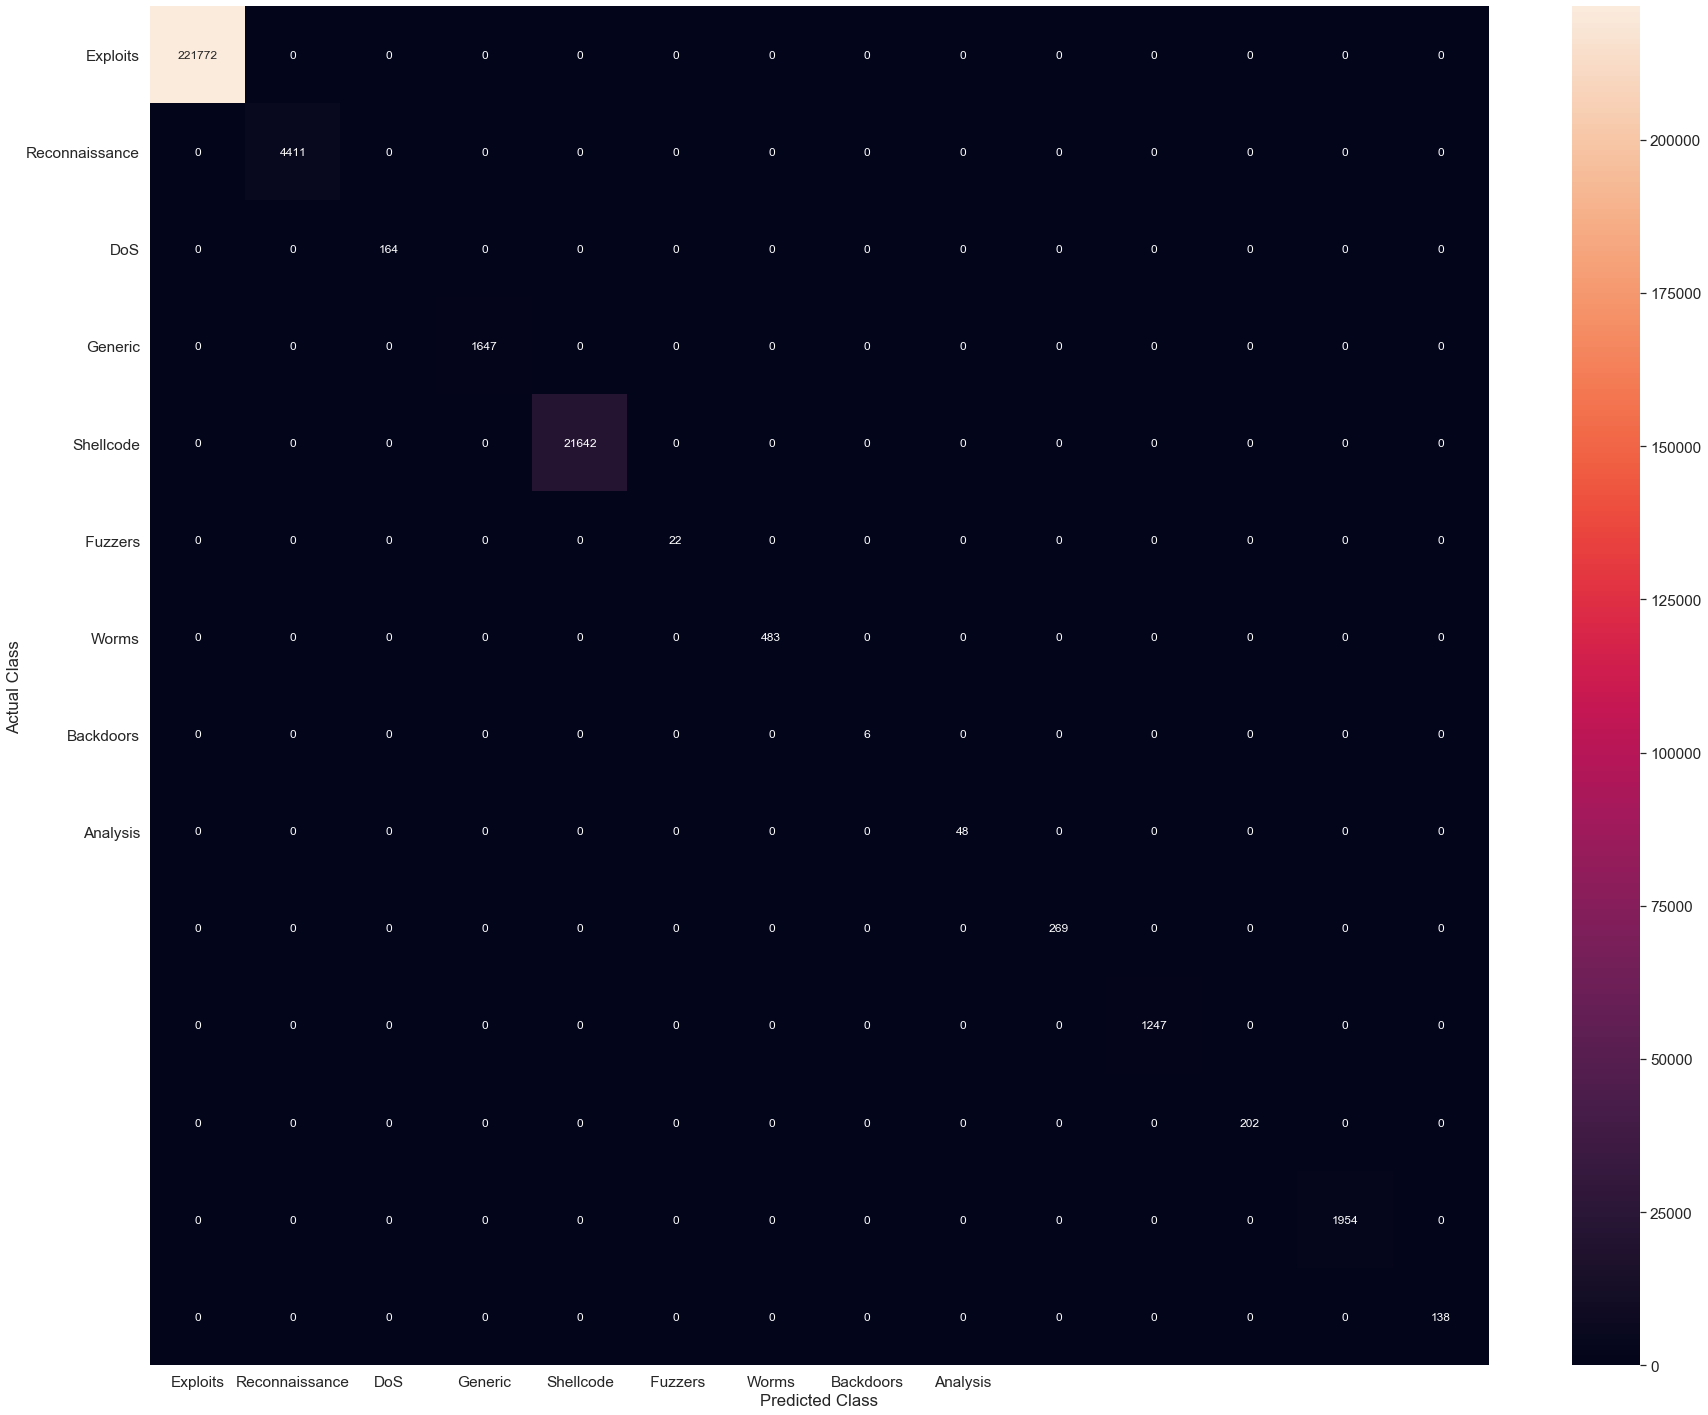

Precision score is:
1.0
Recall score is:
1.0
F1-score is:
1.0


In [23]:
hyperparameter = {'var_smoothing':[10**x for x in range(-9,3)]}
nb = GaussianNB()
nb_grid = GridSearchCV(nb, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)
nb_results, a, Y_pred = model(nb, X_train, Y_train, X_test, Y_test)

Naive Bayes has given us a supposed accuarcy of 100%. I say supposed as I am slighlty skeptical as to whether we have implemented this correctly due to the fact the model only took roughly 30 secs to train and make a prediction on the test data. In Assessment 1, it took roughly 3 minutes to train on 250k datapoints, i.e one tenth the size of our dataset we are currently using so one would expect a longer run-time. However, in this case we have significantly more classes for data to be classified into which perhaps has an affect on the run-time. In terms of the accuracy, we were also perhaps surprised. Naive Bayes as the name suggests is a naive approach designed to be quick and efficent while giving a good accuracy overall. The fact we have more classes and 10x the datapoints for the model to train itself on than in Assessment 1, this could explain the reason for our 100% accuracy so long that the model has been implemented correctly. 

# Auto Encoder Neural Network

Autoencoder Neural Network is a model which seeks to learn a compressed representation of a given input and give a output which has the same representation. They are composed of an encoder and decoder and a 'loss' function and can be used for feature extraction on classification predicitive modelling problems which is how we aim to use them in this Assessment. The encoder and decoder can be parametric functions, generally neural networks and they must be differentiable we respect to the loss function, so the loss can me minimised by Stochastic Gradient Descent.

In the following section we aim to build our model and hopefully run a few epochs on my home computer before sending a more in-depth run to the HPC for to obtain our results.

In [24]:
import keras
from keras import layers, models
from keras.layers import Dense

In [25]:
#Using 32 floats hence:
encoding_dim = 32

input_data = keras.Input(shape=X_train.shape[1])
#Encoded representation
encoded = layers.Dense(encoding_dim, activation='relu')(input_data)
#Loss reconstruction
decoded = layers.Dense(X_train.shape[1], activation='softmax')(encoded)
#Maps the input to its reconstruction
autoencoder = keras.Model(input_data, decoded)

In [26]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 49)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                1600      
_________________________________________________________________
dense_1 (Dense)              (None, 49)                1617      
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [27]:
autoencoder.compile(metrics=['accuracy'], optimizer='adam', loss='mse')

In [28]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, shuffle= True, validation_data=(X_test, X_test))

Epoch 1/10
8930/8930 [==============================] - 17s 2ms/step - loss: 0.9321 - accuracy: 0.5783 - val_loss: 0.8811 - val_accuracy: 0.7003
Epoch 2/10
8930/8930 [==============================] - 39s 4ms/step - loss: 0.9052 - accuracy: 0.6878 - val_loss: 0.8807 - val_accuracy: 0.6779
Epoch 3/10
8930/8930 [==============================] - 33s 4ms/step - loss: 0.9250 - accuracy: 0.6935 - val_loss: 0.8807 - val_accuracy: 0.7376
Epoch 4/10
8930/8930 [==============================] - 38s 4ms/step - loss: 0.9212 - accuracy: 0.6980 - val_loss: 0.8807 - val_accuracy: 0.7079
Epoch 5/10
8930/8930 [==============================] - 37s 4ms/step - loss: 0.9112 - accuracy: 0.6976 - val_loss: 0.8807 - val_accuracy: 0.7143
Epoch 6/10
8930/8930 [==============================] - 31s 4ms/step - loss: 0.8927 - accuracy: 0.6980 - val_loss: 0.8807 - val_accuracy: 0.6601
Epoch 7/10
8930/8930 [==============================] - 35s 4ms/step - loss: 0.9293 - accuracy: 0.7008 - val_loss: 0.8806 - val_ac

Intially, after 40 epochs, we obtain a accuracy of of 0.81 which is ok but we would obviously like this to be much higher but as a proof of concept, this is plenty sufficent to begin with. I messed around briefly changing the activation and loss functions to see if I could obtain any increases in accuracy but to little avail. From what I found in my research it appears 'sigmoid' is more suited to binary classification problems and we shall be using 'softmax' in our decoder as we have a multi-class classification problem.

Next, we try a few different methods to try and improve the accuracy.

In [29]:
#First we change the dimension to 64 to see if we have any improvements.

encoding_dim = 64

input_data = keras.Input(shape=X_train.shape[1])
#Encoded representation
encoded = layers.Dense(encoding_dim, activation='relu')(input_data)
#Loss reconstruction
decoded = layers.Dense(X_train.shape[1], activation='softmax')(encoded)
#Maps the input to its reconstruction
autoencoder = keras.Model(input_data, decoded)

autoencoder.compile(metrics=['accuracy'], optimizer='adam', loss='mse')

In [30]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 49)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                3200      
_________________________________________________________________
dense_3 (Dense)              (None, 49)                3185      
Total params: 6,385
Trainable params: 6,385
Non-trainable params: 0
_________________________________________________________________


In [31]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, shuffle= True, validation_data=(X_test, X_test))

Epoch 1/10
8930/8930 [==============================] - 32s 3ms/step - loss: 0.9009 - accuracy: 0.7208 - val_loss: 0.8756 - val_accuracy: 0.8208
Epoch 2/10
8930/8930 [==============================] - 25s 3ms/step - loss: 0.9055 - accuracy: 0.8405 - val_loss: 0.8754 - val_accuracy: 0.8435
Epoch 3/10
8930/8930 [==============================] - 16s 2ms/step - loss: 0.8936 - accuracy: 0.8448 - val_loss: 0.8747 - val_accuracy: 0.8327
Epoch 4/10
8930/8930 [==============================] - 17s 2ms/step - loss: 0.8990 - accuracy: 0.8487 - val_loss: 0.8746 - val_accuracy: 0.8664
Epoch 5/10
8930/8930 [==============================] - 16s 2ms/step - loss: 0.8966 - accuracy: 0.8485 - val_loss: 0.8746 - val_accuracy: 0.8068
Epoch 6/10
8930/8930 [==============================] - 17s 2ms/step - loss: 0.9148 - accuracy: 0.8472 - val_loss: 0.8746 - val_accuracy: 0.8831
Epoch 7/10
8930/8930 [==============================] - 21s 2ms/step - loss: 0.8987 - accuracy: 0.8488 - val_loss: 0.8746 - val_ac

Now we add new layers

In [32]:
encoding_dim = 128

input_data = keras.Input(shape=X_train.shape[1])
#Encoded representation
encoded = layers.Dense(encoding_dim, activation='relu')(input_data)
#Adding layers
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
#Loss reconstruction
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(X_train.shape[1], activation='softmax')(decoded)
#Maps the input to its reconstruction
autoencoder = keras.Model(input_data, decoded)

autoencoder.compile(metrics=['accuracy'], optimizer='adam', loss='mse')

In [38]:
auto_fit = autoencoder.fit(X_train, X_train, epochs=5, batch_size=256, shuffle= True, validation_data=(X_test, X_test))

Epoch 1/5
8930/8930 [==============================] - 29s 3ms/step - loss: 0.9154 - accuracy: 0.7877 - val_loss: 0.8845 - val_accuracy: 0.7448
Epoch 2/5
8930/8930 [==============================] - 28s 3ms/step - loss: 0.9156 - accuracy: 0.7872 - val_loss: 0.8845 - val_accuracy: 0.7744
Epoch 3/5
8930/8930 [==============================] - 29s 3ms/step - loss: 0.9154 - accuracy: 0.7885 - val_loss: 0.8845 - val_accuracy: 0.7775
Epoch 4/5
8930/8930 [==============================] - 34s 4ms/step - loss: 0.9154 - accuracy: 0.7890 - val_loss: 0.8845 - val_accuracy: 0.7634
Epoch 5/5
8930/8930 [==============================] - 31s 3ms/step - loss: 0.9154 - accuracy: 0.7890 - val_loss: 0.8845 - val_accuracy: 0.7757


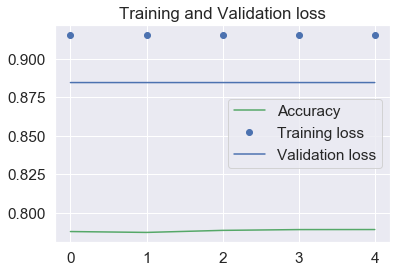

In [47]:
loss = auto_fit.history['loss']
val_loss = auto_fit.history['val_loss']
accuracy = auto_fit.history['accuracy']
epochs = range(5)
plt.figure()
plt.plot(epochs, accuracy, 'g', label='Accuracy')
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
pickle.dump(epochs, open('epochs.p','wb'))
pickle.dump(loss, open('loss.p','wb'))
pickle.dump(val_loss, open('val_loss.p','wb'))
pickle.dump(accuracy, open('accuracy.p'.'wb'))

In [ ]:
epochs = pickle.read(open('epochs.p','rb'))

In [ ]:
plt.figure()
plt.plot(epochs, accuracy, 'g', label='Accuracy')
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import classification_report

predicted_classes = autoencoder.predict(X_test)

target_names = ["Class {}".format(i) for i in (ac_dict.keys())]
print(classification_report(Y_test, predicted_classes.argmax(axis=1)))

/Users/lukehawley/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lukehawley/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.80      0.00      0.00    221772
           1       0.00      0.00      0.00      4411
           2       0.00      0.00      0.00       164
           3       0.00      0.00      0.00      1647
           4       0.03      0.01      0.02     21642
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00       483
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00       269
          10       0.00      0.00      0.00      1247
          11       0.00      0.00      0.00       202
          12       0.00      0.00      0.00      1954
          13       0.00      0.00      0.00       138
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

In [52]:
np.argmax(predicted_classes)

439

In [54]:
ac_dict

{0: 0,
 'Exploits': 1,
 'Reconnaissance': 2,
 'DoS': 3,
 'Generic': 4,
 'Shellcode': 5,
 ' Fuzzers': 6,
 'Worms': 7,
 'Backdoors': 8,
 'Analysis': 9,
 ' Reconnaissance ': 10,
 'Backdoor': 11,
 ' Fuzzers ': 12,
 ' Shellcode ': 13}

In [55]:
ac_dict.keys()

dict_keys([0, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode', ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Reconnaissance ', 'Backdoor', ' Fuzzers ', ' Shellcode '])